In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

Read in hours worked data

In [3]:
df = pd.read_excel("../data/utilization-tracker/hours-ytd.xlsx", parse_dates=['Entry Date'])
df.head()

,User Name,Entry Date,Activity Name,Hours Worked,Time Off Hrs,Time Off Type
0,"Abragan, Maria",2019-04-08,HR & Recruiting (Int'l),7.0,0.0,
1,"Abragan, Maria",2019-04-09,General (Int'l),2.0,0.0,
2,"Abragan, Maria",2019-04-09,HR & Recruiting (Int'l),3.0,0.0,
3,"Abragan, Maria",2019-04-09,Planning and Ops (Int'l),3.0,0.0,
4,"Abragan, Maria",2019-04-10,General (Int'l),2.0,0.0,


In [4]:
df['Entry Month'] = pd.DatetimeIndex(df['Entry Date']).month
df

,User Name,Entry Date,Activity Name,Hours Worked,Time Off Hrs,Time Off Type,Entry Month
0,"Abragan, Maria",2019-04-08,HR & Recruiting (Int'l),7.00,0.0,,4
1,"Abragan, Maria",2019-04-09,General (Int'l),2.00,0.0,,4
2,"Abragan, Maria",2019-04-09,HR & Recruiting (Int'l),3.00,0.0,,4
3,"Abragan, Maria",2019-04-09,Planning and Ops (Int'l),3.00,0.0,,4
4,"Abragan, Maria",2019-04-10,General (Int'l),2.00,0.0,,4
...,...,...,...,...,...,...,...
23355,"Wells, Milena",2019-08-15,General (CH),3.25,0.0,,8
23356,"Wells, Milena",2019-08-16,General (CH),6.00,0.0,,8
23357,"Wells, Milena",2019-08-19,General (CH),6.75,0.0,,8
23358,"Wells, Milena",2019-08-20,General (CH),6.00,0.0,,8


Pull the time off hours into hours worked and the time off type into activity name

In [5]:
df['Hours Worked'] = df['Hours Worked'] + df['Time Off Hrs']

In [6]:
df['Activity Name'] = df['Activity Name'] + df['Time Off Type']

In [7]:
df.drop(['Time Off Hrs', 'Time Off Type'], axis=1, inplace=True)

In [8]:
# Activity names are imported with trailing whitespace, use pd.str.strip to remove
df['Activity Name'] = df['Activity Name'].str.strip()

Join activity classification

In [9]:
activities = pd.read_excel('../data/utilization-tracker/utilization-inputs.xlsx', 'ACTIVITY')
activities

,Activity Name,Classification
0,COL 7.5.1,Billable
1,CS21 Updates (DWR),Billable
2,CV Resilience,Billable
3,CVHE- PFS,Billable
4,EDF Team Habitat Support (CVHE-Pilot),Billable
...,...,...
194,WA P3 Analysis (Municipal Water),Billable
195,WA SW CBP3 Guidebook (Habitat),Billable
196,WA SW CBP3 Guidebook (Municipal Water),Billable
197,WC GI Plan,Billable


In [10]:
df = df.set_index('Activity Name').join(activities.set_index('Activity Name')).reset_index()

,Activity Name,User Name,Entry Date,Hours Worked,Entry Month,Classification
0,Annual Leave,"Abragan, Maria",2019-11-04,8.00,11,NaN
1,Annual Leave,"Abragan, Maria",2019-11-05,8.00,11,NaN
2,Annual Leave,"Abragan, Maria",2019-12-02,8.00,12,NaN
3,Annual Leave,"Abragan, Maria",2019-12-03,8.00,12,NaN
4,Annual Leave,"Ajroud, Brittany",2019-04-25,8.00,4,NaN
5,Annual Leave,"Ajroud, Brittany",2019-04-26,8.00,4,NaN
6,Annual Leave,"Ajroud, Brittany",2019-09-09,8.00,9,NaN
7,Annual Leave,"Ajroud, Brittany",2019-09-10,8.00,9,NaN
8,Annual Leave,"Ajroud, Brittany",2019-09-11,8.00,9,NaN
9,Annual Leave,"Ajroud, Brittany",2019-10-21,8.00,10,NaN


Subset by name for all hours (monthly basis)

In [208]:
individual_hours_day = df[df['User Name']=='Anderson, Erik']
individual_hours_day

,Activity Name,User Name,Entry Date,Hours Worked,Entry Month,Classification
24,Annual Leave,"Anderson, Erik",2019-04-01,8.00,4,NaN
25,Annual Leave,"Anderson, Erik",2019-04-02,8.00,4,NaN
26,Annual Leave,"Anderson, Erik",2019-04-03,5.44,4,NaN
27,Annual Leave,"Anderson, Erik",2019-04-30,2.94,4,NaN
28,Annual Leave,"Anderson, Erik",2019-07-05,1.75,7,NaN
...,...,...,...,...,...,...
22640,Sabbatical,"Anderson, Erik",2019-11-08,1.82,11,NaN
22694,Sick,"Anderson, Erik",2019-04-16,8.00,4,NaN
22695,Sick,"Anderson, Erik",2019-05-31,8.00,5,NaN
22696,Sick,"Anderson, Erik",2019-11-05,8.00,11,NaN


In [27]:
individual_hours = (df[df['User Name']=='Anderson, Erik']
                    .groupby(['Entry Month', 'Classification']).sum()
                    .reset_index()
                    .set_index('Entry Month'))

In [196]:
individual_hours.tail(1).reset_index()['Entry Month'][0]

12

Save billable hours into billable

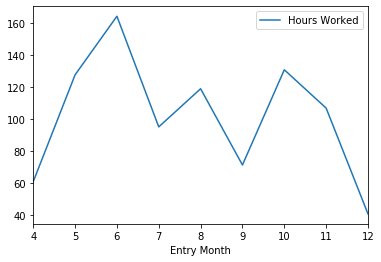

In [151]:
billable = individual_hours.loc[individual_hours['Classification']=='Billable']
billable.plot.line()

In [141]:
billable

,Classification,Hours Worked
Entry Month,,
4,Billable,60.72
5,Billable,127.75
6,Billable,164.54
7,Billable,95.14
8,Billable,119.06
9,Billable,71.24
10,Billable,130.96
11,Billable,106.91
12,Billable,40.55


Zero fill billable for remaining months

In [133]:
list_months = dates['Month'].unique()
list_months

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3], dtype=int64)

In [158]:
new_row = pd.Series([3, "Billable", 0], billable.reset_index().columns)
new_row

Entry Month              3
Classification    Billable
Hours Worked             0
dtype: object

In [ ]:
existing_months = billable.index
columns = billable.reset_index().columns
billable.reset_index(inplace=True)
for m in list_months:    
    if m not in existing_months:
        new_row = pd.Series([m, "Billable", 0], columns)
        billable = billable.append(new_row, ignore_index=True)

In [156]:
billable.set_index('Entry Month', inplace=True)

In [157]:
billable

,Classification,Hours Worked
Entry Month,,
4,Billable,60.72
5,Billable,127.75
6,Billable,164.54
7,Billable,95.14
8,Billable,119.06
9,Billable,71.24
10,Billable,130.96
11,Billable,106.91
12,Billable,40.55


Read in date data

In [34]:
dates = pd.read_excel("../data/utilization-tracker/utilization-inputs.xlsx", "DATES", parse_dates=['Date'])
dates

,Date,Weekday,Holiday,Remaining
0,2019-04-01,True,False,22
1,2019-04-02,True,False,21
2,2019-04-03,True,False,20
3,2019-04-04,True,False,19
4,2019-04-05,True,False,18
...,...,...,...,...
361,2020-03-27,True,False,3
362,2020-03-28,False,False,2
363,2020-03-29,False,False,2
364,2020-03-30,True,False,2


Calculate fte hours per month

In [42]:
dates['Month'] = pd.DatetimeIndex(dates['Date']).month
months = dates.groupby('Month').max()
months['FTE'] = months['Remaining']*8
months

,Date,Weekday,Holiday,Remaining,FTE
Month,,,,,
1,2020-01-31,True,True,23,184
2,2020-02-29,True,False,20,160
3,2020-03-31,True,False,22,176
4,2019-04-30,True,False,22,176
5,2019-05-31,True,True,23,184
6,2019-06-30,True,False,20,160
7,2019-07-31,True,True,23,184
8,2019-08-31,True,False,22,176
9,2019-09-30,True,True,21,168


In [164]:
utilization = billable.join(months['FTE'])
utilization

,Classification,Hours Worked,FTE
Entry Month,,,
4,Billable,60.72,176
5,Billable,127.75,184
6,Billable,164.54,160
7,Billable,95.14,184
8,Billable,119.06,176
9,Billable,71.24,168
10,Billable,130.96,184
11,Billable,106.91,168
12,Billable,40.55,176


In [166]:
utilization['Util'] = utilization['Hours Worked'] / utilization['FTE']

In [167]:
utilization

,Classification,Hours Worked,FTE,Util
Entry Month,,,,
4,Billable,60.72,176,0.345000
5,Billable,127.75,184,0.694293
6,Billable,164.54,160,1.028375
7,Billable,95.14,184,0.517065
8,Billable,119.06,176,0.676477
9,Billable,71.24,168,0.424048
10,Billable,130.96,184,0.711739
11,Billable,106.91,168,0.636369
12,Billable,40.55,176,0.230398


Update utilization with predicted utilization for this month (consider updating with today, rather than last day)

In [214]:
this_month = individual_hours.last_valid_index()
this_month

12

In [ ]:
utilization['Util to Date'] = utilization['Util']

In [210]:
last_day = individual_hours_day['Entry Date'].max()
last_day

Timestamp('2019-12-11 00:00:00')

In [219]:
days_remaining = dates.loc[dates['Date']==last_day, 'Remaining']

In [221]:
days_remaining

254    15
Name: Remaining, dtype: int64

In [251]:
current_hours = utilization.loc[this_month, 'Hours Worked']
current_utilization = utilization.loc[this_month, 'Util']
hours_remaining = days_remaining * 8
predicted_hours = current_hours + (hours_remaining * current_utilization)
predicted_utilization = predicted_hours/utilization.loc[this_month, 'FTE']
predicted_utilization

254    0.387487
Name: Remaining, dtype: float64

In [229]:
utilization.at[this_month, 'Util to Date'] = predicted_utilization
utilization

,Classification,Hours Worked,FTE,Util,Util to Date
Entry Month,,,,,
4,Billable,60.72,176,0.345000,0.345000
5,Billable,127.75,184,0.694293,0.694293
6,Billable,164.54,160,1.028375,1.028375
7,Billable,95.14,184,0.517065,0.517065
8,Billable,119.06,176,0.676477,0.676477
9,Billable,71.24,168,0.424048,0.424048
10,Billable,130.96,184,0.711739,0.711739
11,Billable,106.91,168,0.636369,0.636369
12,Billable,40.55,176,0.230398,0.387487


Assign predicted utilizations

In [255]:
utilization['Predicted Hours'] = utilization['Hours Worked']
utilization

,Classification,Hours Worked,FTE,Util,Util to Date,Predicted Util,Predicted Hours
Entry Month,,,,,,,
4,Billable,60.72,176,0.345000,0.345000,60.72,60.72
5,Billable,127.75,184,0.694293,0.694293,127.75,127.75
6,Billable,164.54,160,1.028375,1.028375,164.54,164.54
7,Billable,95.14,184,0.517065,0.517065,95.14,95.14
8,Billable,119.06,176,0.676477,0.676477,119.06,119.06
9,Billable,71.24,168,0.424048,0.424048,71.24,71.24
10,Billable,130.96,184,0.711739,0.711739,130.96,130.96
11,Billable,106.91,168,0.636369,0.636369,106.91,106.91
12,Billable,40.55,176,0.230398,0.387487,40.55,40.55


In [261]:
predicted_value = utilization.loc[this_month, 'Predicted Hours']
utilization.loc[utilization['Util'] == 0, 'Predicted Hours'] = predicted_value

In [264]:
utilization

,Classification,Hours Worked,FTE,Util,Util to Date,Predicted Hours
Entry Month,,,,,,
4,Billable,60.72,176,0.345000,0.345000,60.72
5,Billable,127.75,184,0.694293,0.694293,127.75
6,Billable,164.54,160,1.028375,1.028375,164.54
7,Billable,95.14,184,0.517065,0.517065,95.14
8,Billable,119.06,176,0.676477,0.676477,119.06
9,Billable,71.24,168,0.424048,0.424048,71.24
10,Billable,130.96,184,0.711739,0.711739,130.96
11,Billable,106.91,168,0.636369,0.636369,106.91
12,Billable,40.55,176,0.230398,0.387487,40.55


In [265]:
utilization['Expected Utilization'] = utilization['Predicted Hours'].cumsum() / utilization['FTE'].cumsum()
utilization

,Classification,Hours Worked,FTE,Util,Util to Date,Predicted Hours,Expected Utilization
Entry Month,,,,,,,
4,Billable,60.72,176,0.345000,0.345000,60.72,0.345000
5,Billable,127.75,184,0.694293,0.694293,127.75,0.523528
6,Billable,164.54,160,1.028375,1.028375,164.54,0.678865
7,Billable,95.14,184,0.517065,0.517065,95.14,0.636577
8,Billable,119.06,176,0.676477,0.676477,119.06,0.644557
9,Billable,71.24,168,0.424048,0.424048,71.24,0.609208
10,Billable,130.96,184,0.711739,0.711739,130.96,0.624521
11,Billable,106.91,168,0.636369,0.636369,106.91,0.625943
12,Billable,40.55,176,0.230398,0.387487,40.55,0.581770


In [3]:
data = pd.read_excel('../data/utilization-tracker/restpoint_ea.xlsx')

In [13]:
data

,Entry Month,Classification,Hours Worked,FTE,Util,Util to Date,Predicted Hours,Expected Utilization
0,Apr,Billable,60.72,176,0.345000,0.345000,60.72,0.345000
1,May,Billable,127.75,184,0.694293,0.694293,127.75,0.523528
2,Jun,Billable,164.54,160,1.028375,1.028375,164.54,0.678865
3,Jul,Billable,95.14,184,0.517065,0.517065,95.14,0.636577
4,Aug,Billable,119.06,176,0.676477,0.676477,119.06,0.644557
5,Sept,Billable,71.24,168,0.424048,0.424048,71.24,0.609208
6,Oct,Billable,130.96,184,0.711739,0.711739,130.96,0.624521
7,Nov,Billable,106.91,168,0.636369,0.636369,106.91,0.625943
8,Dec,Billable,40.55,176,0.230398,0.387487,40.55,0.581770
9,Jan,Billable,0.00,184,0.000000,0.000000,40.55,0.543989


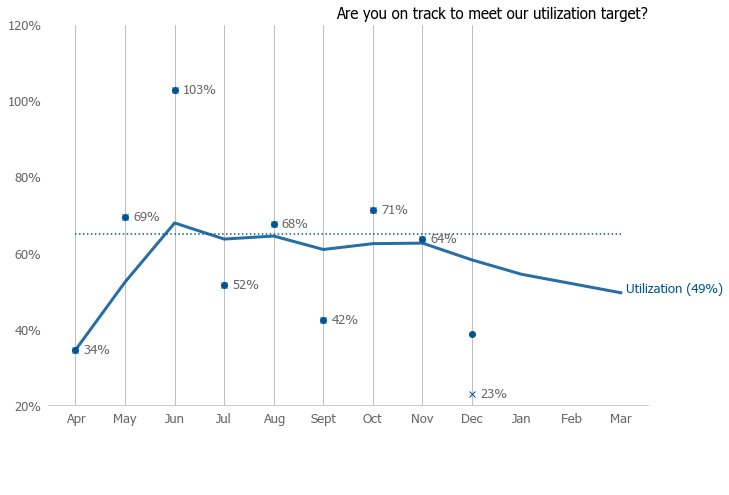

In [38]:
plt.rcParams['font.sans-serif'] = 'Tahoma'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 13

util_color = '#005595'
util_target = 65

fig, ax1 = plt.subplots(figsize=[10.75,7])

# Hide grid lines to denote prediction portion of graph, Note zorder must be specified
# in fill_between call
for i in [9, 10, 11]:
    ax1.axes.axvline(i, color='white', linewidth=2)

# Plot data
ax1.plot(data['Expected Utilization']*100, color=util_color, linewidth=3, alpha=.85)

# Plot actuals
ax1.plot(data['Util']*100, color=util_color, marker='x', lw=0)

# Plot projected
ax1.plot(data['Util to Date']*100, color=util_color, marker='o', lw=0, alpha=1)

# Plot targets
ax1.plot([util_target]*12, color=util_color, linestyle='dotted')

# Label actuals
for x, y in zip(np.arange(0,12), data['Util']*100):
    label = f'{y:.0f}%'
    ax1.annotate(label, 
                 (x, y), 
                 textcoords="offset points", 
                 xytext=(8,0), 
                 ha='left',
                va='center',
                color = 'dimgrey')

# Set title
ax1.set_title('Are you on track to meet our utilization target?', loc='right', fontsize=15)

# Adjust axes ranges
ax1.set_ylim(20, 120)

# Adjust number of labels
ax1.yaxis.set_major_locator(plt.MaxNLocator(5))

# Format y labels as percent
ax1.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))

# Set x labels
ax1.set_xticks(np.arange(0,12))
ax1.set_xticklabels(data['Entry Month'])

# Add grid Lines
ax1.yaxis.grid(False)
ax1.xaxis.grid(True)

# Customize grid lines
ax1.axes.grid(axis='x', linestyle='-')

# Set below graph objects
ax1.set_axisbelow(True)

# Remove Axes ticks
ax1.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

# Recolor axis labels
ax1.tick_params(colors='dimgrey')

# Remove axes spines
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_color('silver')

# Labels
util_value = data.loc[data['Entry Month']=='Mar', 'Expected Utilization']*100
ax1.text(11.1, util_value, f'Utilization ({int(util_value)}%)', color=util_color)

plt.show()